In [56]:
import pandas as pd
import spacy
from spacy import displacy
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
plt.rcParams['figure.figsize'] = 15,8
sns.set(rc={'figure.figsize':(15,8)})

In [21]:
df = pd.read_csv("data/lyrics/genius_v3.csv")

In [22]:
genius=df.iloc[:,2:]

In [23]:
nlp = spacy.load("en_core_web_lg")


In [24]:
neighborhoods=pd.read_csv("data/neighborhoods/cleaned_neighborhoods.csv").iloc[:,1:].Neighborhoods.values.sum().split(", ")

In [25]:
import regex as re

In [26]:
start_template="\[\"(.*) Lyrics\["
m=re.search(start_template,'"["Unforgettable Lyrics[Chorus: Swae Lee]')
m.group(1)

'Unforgettable'

In [27]:
for ent in nlp("Feelin' like I'm fresh out of Bronx").ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)


Feelin 0 6 ORG
Bronx 30 35 GPE


In [28]:
LoI=[]
for artist,songs in zip(genius.Name, genius.lyrics):
    lines=str(songs).split("\\n")
    for i,line in enumerate(str(songs).split("\\n")):
        m=re.search(start_template,line)
        line = str(line).replace("\'", "'")
        if m :
            song_name = m.group(1)
        else:
            doc = nlp(line)
            for ent in doc.ents:
                if ent.label_=="GPE" or ent.label_=="LOC" or ent.text in neighborhoods:
                    LoI.append([artist, song_name, ent.text,str(line), str(lines[i-1]) if i!=0 else "", str(lines[i+1]) if i<(len(lines)-1) else ""])


In [29]:
df=pd.DataFrame(LoI, columns=["Artist", "Song Name", "GPE", "Line", "Line Before", "Line After"])
df.to_csv("data/lyrics/genius_ner_v3.csv", index=False)

In [31]:
df=pd.read_csv("data/lyrics/genius_ner_v3.csv")

In [32]:
df

,Artist,Song Name,GPE,Line,Line Before,Line After
0,French Montana,Unforgettable,Montana,[Verse 1: French Montana],Tryna do what lovers do,Feelin' like I'm fresh out; Boosie (Boosie)
1,French Montana,Unforgettable,Montana,[Refrain: Swae Lee & French Montana],"'Cause I pulled out a million cash, told her p...",And you are unforgettable
2,French Montana,Unforgettable,Montana,[Verse 2: French Montana],Tryna do what lovers do,You ain't enough for me
3,French Montana,Unforgettable,Montana,[Refrain: Swae Lee & French Montana],"Baby girl, work your body, work your body",And you are unforgettable
4,French Montana,Unforgettable,Montana,[Chorus: Uncle Luke & French Montana],NaN,"Don\'t stop, pop that, don\'t stop"
...,...,...,...,...,...,...
3275,Ol' Dirty Bastard,Baby Blue,East,"When you take North, East, West, South",To the South,Put it all together and it spell NEWS!
3276,Ol' Dirty Bastard,Baby Blue,West,"When you take North, East, West, South",To the South,Put it all together and it spell NEWS!
3277,Ol' Dirty Bastard,Baby Blue,South,"When you take North, East, West, South",To the South,Put it all together and it spell NEWS!
3278,Ol' Dirty Bastard,Baby Blue,Brooklyn,"Fuck is goin on, niggas from Brooklyn don’t fu...",Is the Brooklyn Zoo in the muthafucka house?,Niggas don’t yell like that


In [33]:
df.GPE.value_counts()

New York          163
Brooklyn          138
Montana            87
Cali               73
Earth              72
                 ... 
don                 1
Esco                1
Silkk               1
Ukraine             1
Blueberry Hill      1
Name: GPE, Length: 1061, dtype: int64

In [34]:
df.shape

(3280, 6)

In [156]:
view =df[df.GPE=="East"]
view.shape

(32, 11)

In [157]:
view.iloc[:30].apply(lambda row : displacy.render(nlp(str(row["Line Before"])+"\n"+str(row["Line"])+"\n"+str(row["Line After"])),style="ent"),axis=1)

/home/lucastrg/FLEP/DS-env/lib/python3.9/site-packages/spacy/displacy/__init__.py:200: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


719     None
749     None
897     None
958     None
1126    None
1198    None
1322    None
1532    None
1534    None
1549    None
1780    None
1906    None
1983    None
2069    None
2089    None
2314    None
2496    None
2501    None
2506    None
2526    None
2581    None
2613    None
2846    None
2849    None
2852    None
2856    None
2859    None
2944    None
2950    None
2997    None
dtype: object

In [6]:
view = df["Harlem" == df.GPE]
view.shape

NameError: name 'df' is not defined

In [38]:
doc = nlp("""I\'m more than a threat, I\'m a problem To hell with Cotton, watch out when I come to Harlem So don\'t whisper or make a sound or quote""")

In [39]:
displacy.render(doc, style="ent")

In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [4]:
sia.polarity_scores("""I\'m more than a threat, I\'m a problem To hell with Cotton, watch out when I come to Harlem So don\'t whisper or make a sound or quote""")

{'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'compound': -0.8996}

In [57]:
df["polarity"]=df.apply(lambda row : sia.polarity_scores(str(row["Line Before"]) if row["Line Before"] else "" +"\n"+row["Line"]+"\n" + str(row["Line Before"]) if row["Line Before"] else ""),axis=1)

In [58]:
df

,Artist,Song Name,GPE,Line,Line Before,Line After,polarity
0,French Montana,Unforgettable,Montana,[Verse 1: French Montana],Tryna do what lovers do,Feelin' like I'm fresh out; Boosie (Boosie),"{'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'comp..."
1,French Montana,Unforgettable,Montana,[Refrain: Swae Lee & French Montana],"'Cause I pulled out a million cash, told her p...",And you are unforgettable,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,French Montana,Unforgettable,Montana,[Verse 2: French Montana],Tryna do what lovers do,You ain't enough for me,"{'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'comp..."
3,French Montana,Unforgettable,Montana,[Refrain: Swae Lee & French Montana],"Baby girl, work your body, work your body",And you are unforgettable,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,French Montana,Unforgettable,Montana,[Chorus: Uncle Luke & French Montana],NaN,"Don\'t stop, pop that, don\'t stop","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...,...,...,...,...
3275,Ol' Dirty Bastard,Baby Blue,East,"When you take North, East, West, South",To the South,Put it all together and it spell NEWS!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3276,Ol' Dirty Bastard,Baby Blue,West,"When you take North, East, West, South",To the South,Put it all together and it spell NEWS!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3277,Ol' Dirty Bastard,Baby Blue,South,"When you take North, East, West, South",To the South,Put it all together and it spell NEWS!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3278,Ol' Dirty Bastard,Baby Blue,Brooklyn,"Fuck is goin on, niggas from Brooklyn don’t fu...",Is the Brooklyn Zoo in the muthafucka house?,Niggas don’t yell like that,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [59]:
df["pos"]=df["polarity"].apply(lambda polarity : polarity.get("pos"))
df["neg"]=df["polarity"].apply(lambda polarity : polarity.get("neg"))
df["neu"]=df["polarity"].apply(lambda polarity : polarity.get("neu"))
df["compound"]=df["polarity"].apply(lambda polarity : polarity.get("compound"))

In [150]:
places=list(df["GPE"].value_counts()[(df["GPE"].value_counts()>12)].index)
less_places = list(df["GPE"].value_counts()[(df["GPE"].value_counts()>25)].index)

In [120]:
len(places)

42

In [126]:
len(less_places)

10

In [151]:
df_filtered=df[df["GPE"].isin(places)]
df_sample=df[df["GPE"].isin(less_places)]

In [93]:
df

,Artist,Song Name,GPE,Line,Line Before,Line After,polarity,pos,neg,neu,compound
0,French Montana,Unforgettable,Montana,[Verse 1: French Montana],Tryna do what lovers do,Feelin' like I'm fresh out; Boosie (Boosie),"{'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'comp...",0.459,0.000,0.541,0.5267
1,French Montana,Unforgettable,Montana,[Refrain: Swae Lee & French Montana],"'Cause I pulled out a million cash, told her p...",And you are unforgettable,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
2,French Montana,Unforgettable,Montana,[Verse 2: French Montana],Tryna do what lovers do,You ain't enough for me,"{'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'comp...",0.459,0.000,0.541,0.5267
3,French Montana,Unforgettable,Montana,[Refrain: Swae Lee & French Montana],"Baby girl, work your body, work your body",And you are unforgettable,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
4,French Montana,Unforgettable,Montana,[Chorus: Uncle Luke & French Montana],NaN,"Don\'t stop, pop that, don\'t stop","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
3275,Ol' Dirty Bastard,Baby Blue,East,"When you take North, East, West, South",To the South,Put it all together and it spell NEWS!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
3276,Ol' Dirty Bastard,Baby Blue,West,"When you take North, East, West, South",To the South,Put it all together and it spell NEWS!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
3277,Ol' Dirty Bastard,Baby Blue,South,"When you take North, East, West, South",To the South,Put it all together and it spell NEWS!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
3278,Ol' Dirty Bastard,Baby Blue,Brooklyn,"Fuck is goin on, niggas from Brooklyn don’t fu...",Is the Brooklyn Zoo in the muthafucka house?,Niggas don’t yell like that,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000


In [117]:
df_filtered

,Artist,Song Name,GPE,Line,Line Before,Line After,polarity,pos,neg,neu,compound
0,French Montana,Unforgettable,Montana,[Verse 1: French Montana],Tryna do what lovers do,Feelin' like I'm fresh out; Boosie (Boosie),"{'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'comp...",0.459,0.000,0.541,0.5267
1,French Montana,Unforgettable,Montana,[Refrain: Swae Lee & French Montana],"'Cause I pulled out a million cash, told her p...",And you are unforgettable,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
2,French Montana,Unforgettable,Montana,[Verse 2: French Montana],Tryna do what lovers do,You ain't enough for me,"{'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'comp...",0.459,0.000,0.541,0.5267
3,French Montana,Unforgettable,Montana,[Refrain: Swae Lee & French Montana],"Baby girl, work your body, work your body",And you are unforgettable,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
4,French Montana,Unforgettable,Montana,[Chorus: Uncle Luke & French Montana],NaN,"Don\'t stop, pop that, don\'t stop","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
3275,Ol' Dirty Bastard,Baby Blue,East,"When you take North, East, West, South",To the South,Put it all together and it spell NEWS!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
3276,Ol' Dirty Bastard,Baby Blue,West,"When you take North, East, West, South",To the South,Put it all together and it spell NEWS!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
3277,Ol' Dirty Bastard,Baby Blue,South,"When you take North, East, West, South",To the South,Put it all together and it spell NEWS!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
3278,Ol' Dirty Bastard,Baby Blue,Brooklyn,"Fuck is goin on, niggas from Brooklyn don’t fu...",Is the Brooklyn Zoo in the muthafucka house?,Niggas don’t yell like that,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000


In [92]:
df["GPE"]=df["GPE"].astype("category")

In [ ]:
df

In [154]:
df_sample["GPE"]=df_sample["GPE"].astype("str").astype("category")

/tmp/ipykernel_5635/2540905232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample["GPE"]=df_sample["GPE"].astype("str").astype("category")


/home/lucastrg/FLEP/DS-env/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 45572 (\N{HANGUL SYLLABLE NU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/lucastrg/FLEP/DS-env/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/lucastrg/FLEP/DS-env/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 45572 (\N{HANGUL SYLLABLE NU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/lucastrg/FLEP/DS-env/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


/home/lucastrg/FLEP/DS-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45572 (\N{HANGUL SYLLABLE NU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lucastrg/FLEP/DS-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


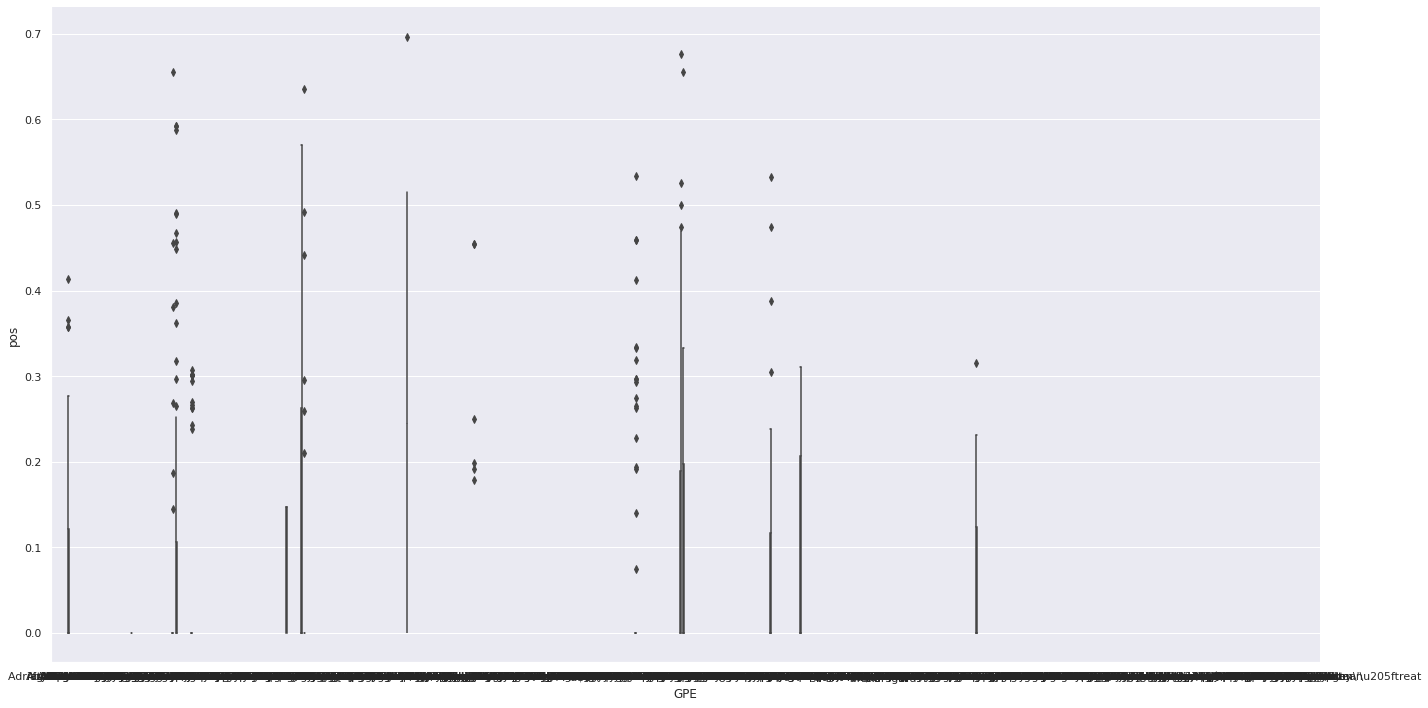

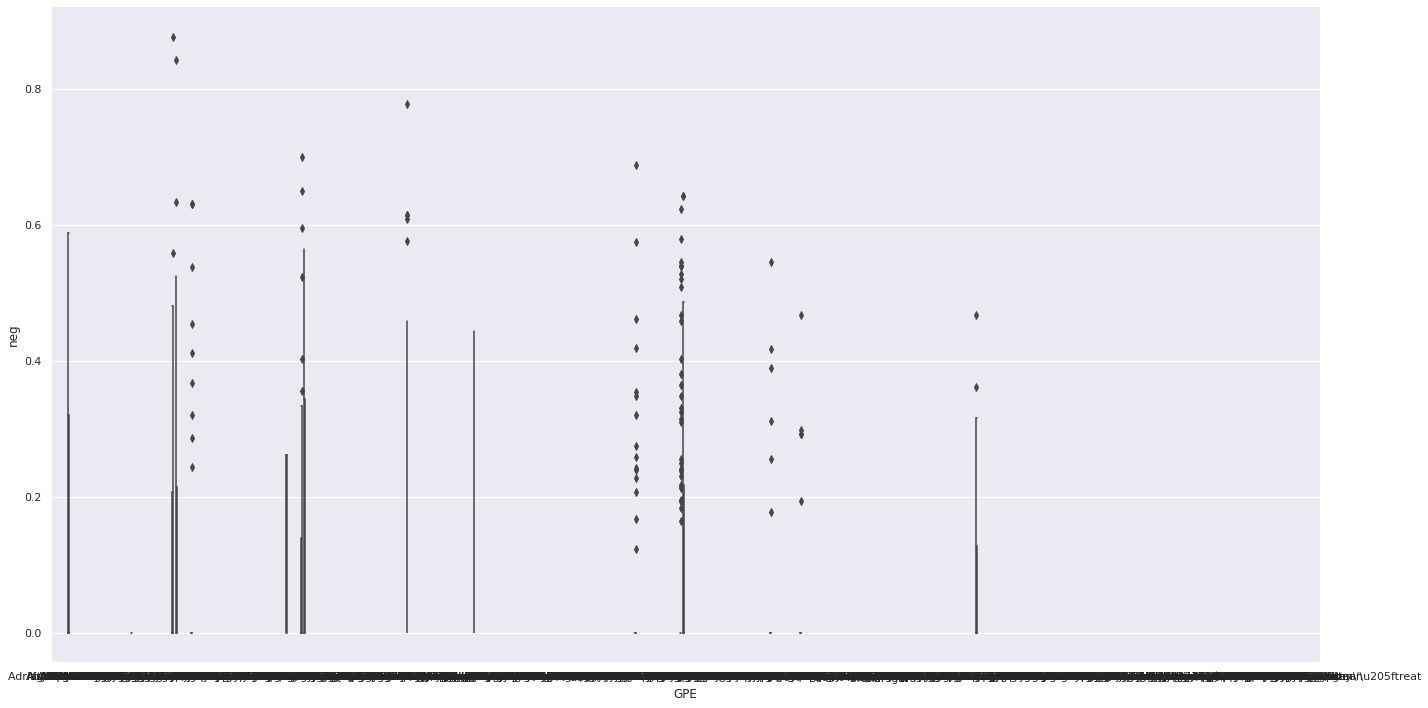

In [152]:

sns.catplot(data=df_sample, y="pos", x="GPE", kind="box", height=10, aspect=2)

sns.catplot(data=df_sample, y="neg", x="GPE", kind="box", height=10, aspect=2)



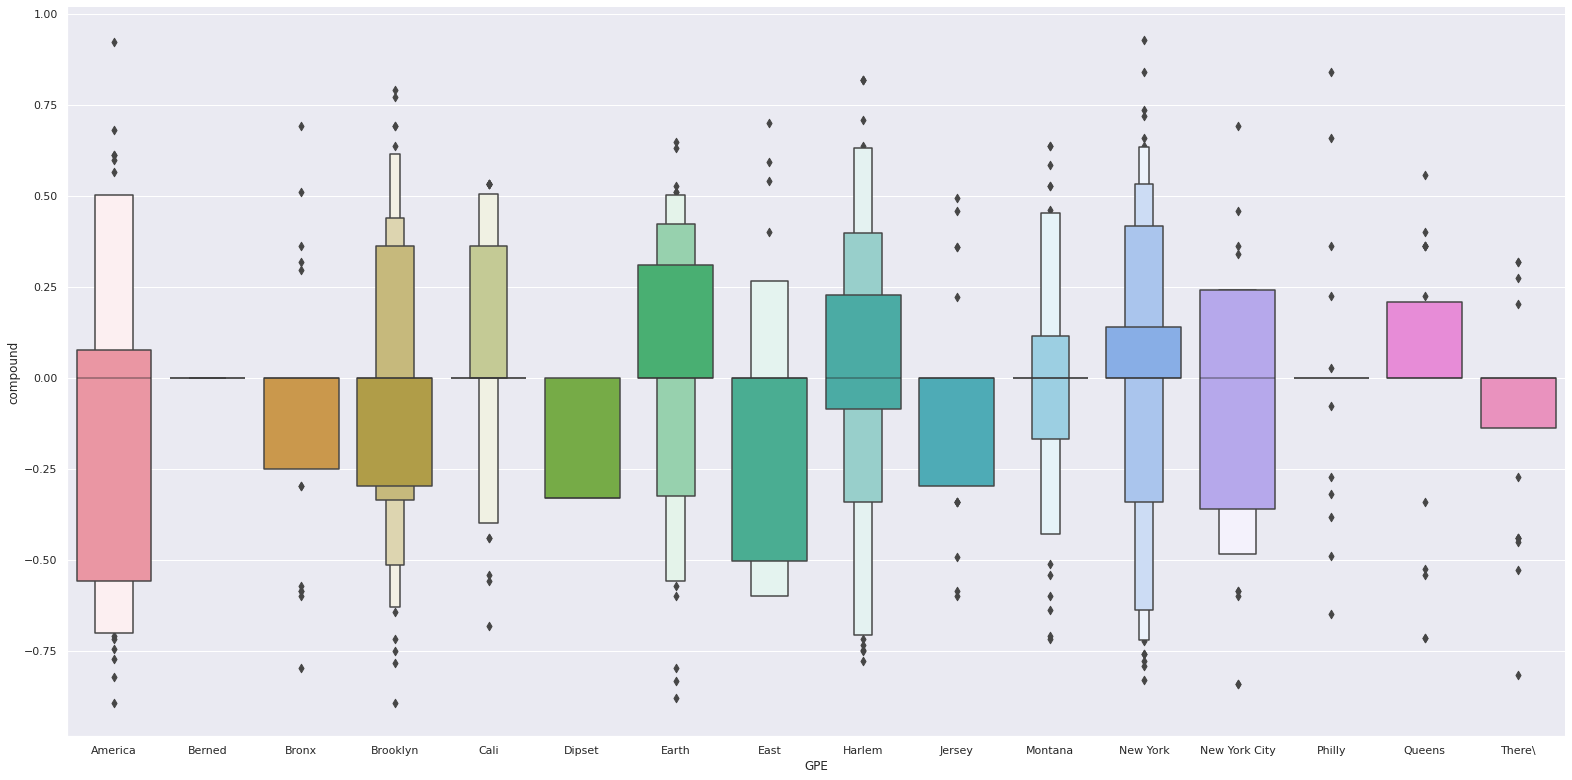

In [155]:
sns.catplot(data=df_sample, y="compound", x="GPE", kind="boxen", height=11, aspect=2)
